# **What is fMRI Data?**

Welcome to the fMRI lab! We will be diving into fMRI data using Python/data science concepts. If you need to review these topics, please go over the optional Python Primer before starting this lesson. 

To begin, we will introduce what fMRI data consists of and how it's represented, and start looking at some sample fMRI data. 

*PLEASE DO NOT EDIT THIS DOCUMENT, MAKE YOUR OWN COPY TO EDIT

#What does fMRI data look like?

In general, fMRI images are stored in the form of DICOM (Digital Imaging and Communications in Medicine) files. This format is used for medical images like Ultrasound or MRI/fMRI and can also contain patient identification information. 

Oftentimes, for fMRI data analysis specifically, these DICOM files are converted into NIfTI files using ```dicomnifti```. NIfTI stands for Neuroimaging Informatics Technology Initiative and the file formate was developed by the NIfTI Data Format Working Group to "facilitate inter-operation of functional MRI data analysis software packages." 

So how do you use these files? We will be using a python package called ```nibabel``` that can read these specific neuroimaging file formats (you can read more about it [here](https://nipy.org/nibabel/gettingstarted.html)). First, import the module by running the cell below (shift + Enter).

In [1]:
import nibabel

ModuleNotFoundError: No module named 'nibabel'

In [ ]:
import os
import numpy as np

Next, let's take a look at an example fMRI image. Import the ```data_path```.



In [ ]:
from nibabel.testing import data_path

I have specified the example image filepath for you, so just run the cell below. 

Tip: Use ```os.path.join``` to join directory paths with filenames.

In [ ]:
image_path = os.path.join(data_path, 'example4d.nii.gz')

Now, load the image using ```nibabel.load```. When you call ```img```, it should output the data type of the NIfTI image!

In [ ]:
img = nibabel.load(image_path)
img

As you can see, ```img``` is an instance of Nifti1Image. This object doesn't actually directly store the actual fMRI data, but rather contains infomation about the fMRI data stored in the file which can be accessed by using attributes of the object. 

For example, let's look at the shape of the object using the ```.shape``` method:

In [ ]:
img.shape

(128, 96, 24, 2)

As we can see the shape is the image is in 4 dimensions: (X, Y, Z, T) where X, Y, and Z make up 3D space and T is time. So, this image has 2 time points each consisting of 24 horizontal slices that are 128 x 96 pixels in area.

Now, you can fetch the array data using the ```.get_fdata()``` method and run the cell below to look at the data type, shape, and array (which should just be an empty array).

In [ ]:
#Apply the .get_fdata() method to img and run cell to fetch array data into cache
data = img.get_fdata() 
print('data type: ', data.dtype)
print('data shape: ', data.shape)
data

data type:  float64
data shape:  (128, 96, 24, 2)


array([[[[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        ...,

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
   

The array data associated with this example image is a 4-dimensional empty array, as desired. Now we can check to make sure the array data has been fetched into this image using the ```.in_memory``` method:

In [ ]:
#Apply the .in_memory method to img and run cell to check if array data is in cache (should return True)
img.in_memory 

True

Yay it worked! You can also ```uncache``` array data. Feel free to play around with this file format!

Another way to look at image metadata is through the ```header``` attribute. The header of an image contains information on the image that can be accessed through get methods. Let's take a look at this example image's header:

In [ ]:
header = img.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 57
dim             : [  4 128  96  24   2   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.000000e+00  2.000000e+00  2.000000e+00  2.199999e+00  2.000000e+03
  1.000000e+00  1.000000e+00  1.000000e+00]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 23
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1162.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.3\x00 v2.25 NIfTI-1 Single file format'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -1.9451068e-26
quatern_c       :

There are several easy commands that you can use to get specific attributes of this header. These are a couple examples and what they do:

```get_data_shape()``` to get the output shape of the image data array (same as ```img.shape``` from earlier)

```get_data_dtype()``` to get the numpy data type in which the image data is stored (or will be stored if you save the image)


```get_zooms()``` to get the voxel sizes in millimeters

Try out some of the common header get methods to take a look at more image details:

In [ ]:
#Shape of image data array
print(header.get_data_shape())

(128, 96, 24, 2)


In [ ]:
#Numpy data type that image data is stored at
print(header.get_data_dtype())

int16


In [ ]:
#Voxel size in millimeters
voxel_size = header.get_zooms()
print(voxel_size)

(2.0, 2.0, 2.199999, 2000.0)


In [ ]:
#4th dimension of voxel_size is time between scans in milliseconds
voxel_size[3]

2000.0

**Transposing 4D fMRI Data**

When working with fMRI data, it is actually more convenient for the data to be in (T, Z, Y, X) format (rather than (X, Y, Z, T)) for analysis. Thus, transposing the data is an important pre-processing step.

To do this, we simply use the  ```transpose()``` command. Let's try this on a simple 2D array first.

In [ ]:
#2D array of all zeros
arr_2D = np.zeros((2, 3))
print(f'Original array shape: {arr_2D.shape}')
arr_2D

Original array shape: (2, 3)


array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
#Transpose command
arr_2D_transposed = arr_2D.transpose()
print(f'Transposed array shape: {arr_2D_transposed.shape}')
arr_2D_transposed

Transposed array shape: (3, 2)


array([[0., 0.],
       [0., 0.],
       [0., 0.]])

As you can see, the array dimensions have been switched. You can also use the ```T``` method, which is a shortcut for ```transpose```.

In [ ]:
#T command
arr_2D_transposed_2 = arr_2D.T
print(f'Transposed array shape: {arr_2D_transposed_2.shape}')
arr_2D_transposed_2

Transposed array shape: (3, 2)


array([[0., 0.],
       [0., 0.],
       [0., 0.]])

Now what about a 3D array?

In [ ]:
#3D array of all zeroes
arr_3D = np.zeros((2, 4, 3))
print(f'Original array shape: {arr_3D.shape}')
arr_3D

Original array shape: (2, 4, 3)


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

What do you think the transposed dimensions will be?

In [ ]:
#T command
arr_3D_transposed = arr_3D.T
print(f'Transposed array shape: {arr_3D_transposed.shape}')
arr_3D_transposed

Transposed array shape: (3, 4, 2)


array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

Tranposing the 3D array inverted the order of the original array dimensions! Now we can see how the ```transpose``` command can be used to transform fMRI data from (X, Y, Z, T) to the more useful format of (T, Z, Y, X). Let's try it with the array data we fetched for the example image before:

In [ ]:
#Recall the empty 4D array of image data from before with shape:
print(f'Original image data shape: {data.shape}')

Original image data shape: (128, 96, 24, 2)


In [ ]:
#Apply either transpose method to data, transposed data shape should be (2, 24, 96, 128)
m = data.shape
array1 = np.zeros(m)
data_transposed = array1.T
print(f'Transposed data shape: {data_transposed.shape}')

Transposed data shape: (2, 24, 96, 128)


If you need any help with how to get this code to work, feel free to ask and we can work through it!

So, as a summary: so far, we have learned how to use the python package ```nibabel``` to load fMRI images and datasets. Then we looked into an fMRI example image and used the ```get_fdata()``` method to fetch the 4D data array for the image and cache it in the image memory. We also explored some other attributes that contain more information about the image. Lastly, we talked about how to transpose the fMRI image data to invert the dimensions using the ```.transpose()``` and ```.T``` commands. This will become more important as we dive deeper into working with actual fMRI data.

# Real fMRI Datasets

Now, we will load and save an fMRI experimental dataset and take a deeper dive into masking, visualizing, and working with a dataset.

First step is exploring the dataset: we will be using a subset of the data from the study **Neural Processing of Emotional Musical and Nonmusical Stimuli in Depression** from Lepping et al. 2017. We downloaded the data from public database openneuro.org, feel free to explore other datasets on their page!

https://openneuro.org/datasets/ds000171/versions/00001

In [ ]:
import nibabel
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
import requests

In [ ]:
# Download data
url = 'https://github.com/neurotech-berkeley/neurotech-course/blob/master/module_3_fMRI_dataset/sub-control01/sub-control01_func_sub-control01_task-music_run-1_bold.nii?raw=true'
r = requests.get(url, allow_redirects=True)
open('sub-control01_func_sub-control01_task-music_run-1_bold.nii', 'wb').write(r.content)
file_path = './'
image_path = os.path.join(file_path, 'sub-control01_func_sub-control01_task-music_run-1_bold.nii')

Let's take a look at the first image: a Never Depressed (ND or control) patient completing the music task.

In [ ]:
control01_music_img = nibabel.load(image_path)
control01_music_img

Just a tad underwhelming, I know. But now we can use some of the basic analytical skills we learned earlier to be able to visualize it!

Let's start by checking out the image shape:

In [ ]:
#Apply the .shape method to the image and run cell to look at the image shape
control01_music_img.shape

(80, 80, 50, 105)

What does this mean again?

The NIFTI image consists of 105 time points each containing 50 horizontal slices that are 80 x 80 pixels in area.

Now let's fetch the array data:

In [ ]:
#Apply the .get_fdata() method to the image we loaded above and run cell to fetch the array data
control01_music_data = control01_music_img.get_fdata()
control01_music_data

memmap([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

         [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

         [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

         ...,

         [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0., 

In [ ]:
print('data type: ', control01_music_data.dtype)
print('data shape: ', control01_music_data.shape)

data type:  float64
data shape:  (80, 80, 50, 105)


Check to make sure the array data is cached:

In [ ]:
i = control01_music_img.in_memory
print(i)
control01_music_img.in_memory

True


True

Nice! Now lastly, let's take a look at the image header, or a summary of all of the image information:

In [ ]:
print(control01_music_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [  4  80  80  50 105   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.000000e+00  2.900000e+00  2.900000e+00  3.000000e+00  3.000000e+00
  1.000000e+00  2.500000e-01  5.331821e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 49
slice_code      : alternating increasing 2
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 20.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b'TE=25;sec=53318.2100;phaseDir=+;dwell=0.250'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.005969083
qua

Last step, transpose the image data array! Remember that right now, the image shape is a 4D array in the format (X, Y, Z, T) but it's more convenient for us to work with array data in the format (T, Z, Y, X) so we need to transpose it:

**DO THIS FOR COMPLETION:**

In [ ]:
#Apply a transpose method to data, transposed data shape should be (105, 50, 80, 80)
transposed_data = #YOUR CODE HERE

SyntaxError: ignored

Great! We not have a real fMRI dataset that has been transposed to the proper format!

# 4D fMRI Data Manipulation

Ok so now we have a 4-dimension array of fMRI data. Remember that this is essentially a 4D scan containing volumetric/voxel data over a series of time points.

**Indexing**

Using the transposed data, we can isolate the voxel time series data by looking at a single voxel, say (1, 1, 1) over all of the time points. Remember that time is the first dimension:

In [ ]:
first_time_series = transposed_data[:, 1, 1, 1]
print(first_time_series.shape)
first_time_series

(105,)


array([42., 36., 30., 34., 35., 38., 30., 33., 39., 33., 32., 37., 46.,
       27., 37., 37., 22., 31., 27., 46., 32., 32., 45., 44., 43., 44.,
       36., 33., 26., 28., 31., 39., 47., 32., 38., 35., 38., 32., 30.,
       43., 44., 30., 40., 33., 37., 41., 37., 32., 31., 30., 37., 41.,
       34., 44., 31., 31., 33., 25., 33., 29., 39., 33., 36., 37., 32.,
       30., 41., 30., 35., 38., 36., 35., 34., 32., 34., 34., 25., 32.,
       40., 37., 49., 36., 25., 45., 29., 27., 33., 29., 32., 35., 40.,
       41., 31., 29., 40., 26., 37., 30., 37., 37., 38., 41., 28., 33.,
       38.])

**Mean**

When working with 4D fMRI data arrays, it can be useful to take a descriptive statistic across time series values especially for pre-processing. For example, taking the mean of the volume data over time gives a descriptive statistic for the whole brain representing the 3D mean volume.

To take the mean over **time** (which is the first dimension) we just have to specify the axis:

In [ ]:
data_mean = transposed_data.mean(axis=0) #axis=0 specifies axis as time, the first (0) dimension
print(data_mean.shape)
data_mean

(50, 80, 80)


array([[[ 0.        , 35.18095238, 36.65714286, ..., 43.9047619 ,
         42.66666667, 41.97142857],
        [ 0.        , 34.96190476, 35.52380952, ..., 43.43809524,
         43.97142857, 43.11428571],
        [ 0.        , 35.28571429, 36.71428571, ..., 44.40952381,
         42.35238095, 41.52380952],
        ...,
        [ 0.        ,  9.93333333, 10.3047619 , ..., 11.4       ,
         10.73333333, 10.42857143],
        [ 0.        ,  9.65714286,  9.83809524, ..., 11.23809524,
         10.23809524,  9.68571429],
        [ 0.        ,  9.1047619 ,  9.26666667, ..., 10.96190476,
          9.7047619 ,  9.48571429]],

       [[ 0.        , 35.41904762, 35.65714286, ..., 42.85714286,
         41.41904762, 40.79047619],
        [ 0.        , 34.94285714, 36.99047619, ..., 42.76190476,
         43.46666667, 42.64761905],
        [ 0.        , 35.44761905, 35.01904762, ..., 43.15238095,
         40.55238095, 39.65714286],
        ...,
        [ 0.        , 10.35238095, 11.31428571, ..., 1

 **Masking**

The last important technique for subsetting data from an array is **masking**. 

How do we mask an array? Masking involves creating a **boolean** array (True/False) version of the data array where values corresponding to **True** masks are kept and values corresponding to **False** masks are not. The masking array must be the same size as the data array so that the indices match up. 

Masks can also be created using **binary operators** (>, <, ==, !=). This helps with larger arrays where typing out all of the True/False values can get really tedious. It also allows us to analyze or filter the values of the array by some condition.

**What's the point of masking?**

Masking allows for selecting certain indices, like indexing, which **reduces dimensionality**: masked arrays have to be returned in a single dimension because after masking, the resulting array elements are no longer necessarily  in a form that fits exactly into the original multiple dimensions. 

We can use masking in fMRI data as a **pre-processing step**, using it to get rid of unwanted voxels or to get just a subset of the voxels we are interested in (for example just data from a certain part of the brain).

To figure out what data we are actually interested in, let's plot a histogram of all of the data.

Text(0, 0.5, 'TRs (count)')

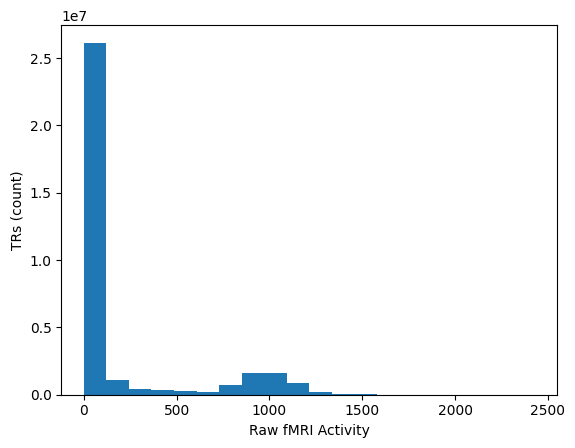

In [ ]:
_ = plt.hist(transposed_data.flatten(), bins=20)
plt.xlabel('Raw fMRI Activity')
plt.ylabel('TRs (count)') #note: TR is the sampling rate

From the histogram, we see that there is a large peak near 0 and another smaller bump around 1000. The values close to 0 are actually from outside of the brain, where the low signal values are caused by external things like air. So we aren't actually interested in the data there.

So how can we extract the data from only the region of the scan that contains brain data? **Masking!**

If we can determine a bottom threshold for the data we are interested in, we can filter out the non-brain data using a boolean mask! Let's take a closer look at a more specific range of the histogram:

Text(0, 0.5, 'TRs (count)')

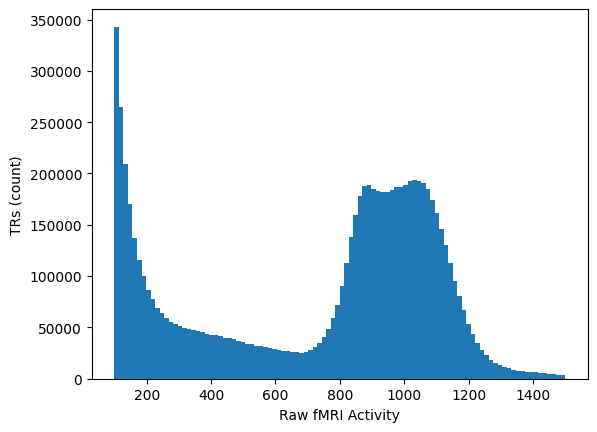

In [ ]:
_ = plt.hist(transposed_data.flatten(), bins=100, range=(100, 1500))
plt.xlabel('Raw fMRI Activity')
plt.ylabel('TRs (count)')

Ok so by setting the range as 100 to 1500, we cut off most of the low signal range data and we can see the main brain data bump better. It looks like the plot as a second peak at around 700 to 1300, so we can set 700 as our low threshold.

In [ ]:
threshold = 700

Next, we have to determine which volume to threshold- this is where the **mean volume** comes in. If we picked an individual volume, it could have noise fluctuations that bias its value. However, the volume is resistant to fluctuations. So, let's mask the mean 3D volume array `data_mean` from before so that only voxels whose mean activity is above the threshold are kept.

In [ ]:
masked_data = data_mean > threshold
print(f'There are {masked_data.sum()} voxel activity values above the threshold.')

There are 48665 voxel activity values above the threshold.


Now let's visualize the mask! We'll use a specifc function to create an interactive plot that shows one axial slice of the 3D mask at a time. Use the sliding bars to move through the brain slices!

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
def plotMask(i):
    plt.figure(figsize=(9,9))
    plt.imshow(masked_data[i,:,:], cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
    
num_axial_slices = masked_data.shape[0]
_ = interact(plotMask, i=widgets.IntSlider(min=0,max=num_axial_slices-1,step=1,value=num_axial_slices/2))

NameError: ignored

We can also use a similar function to plot the data directly without a filtering mask:

interactive(children=(IntSlider(value=25, description='i', max=49), Output()), _dom_classes=('widget-interact'…

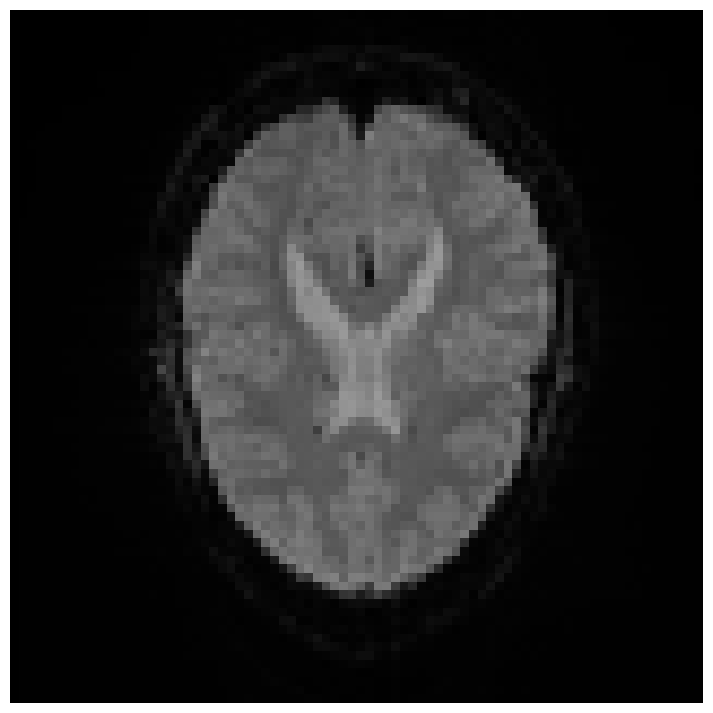

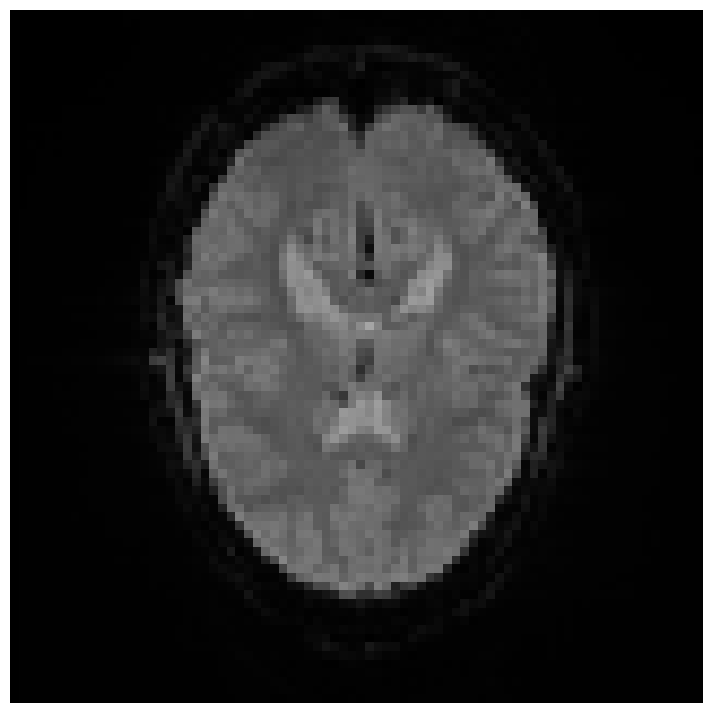

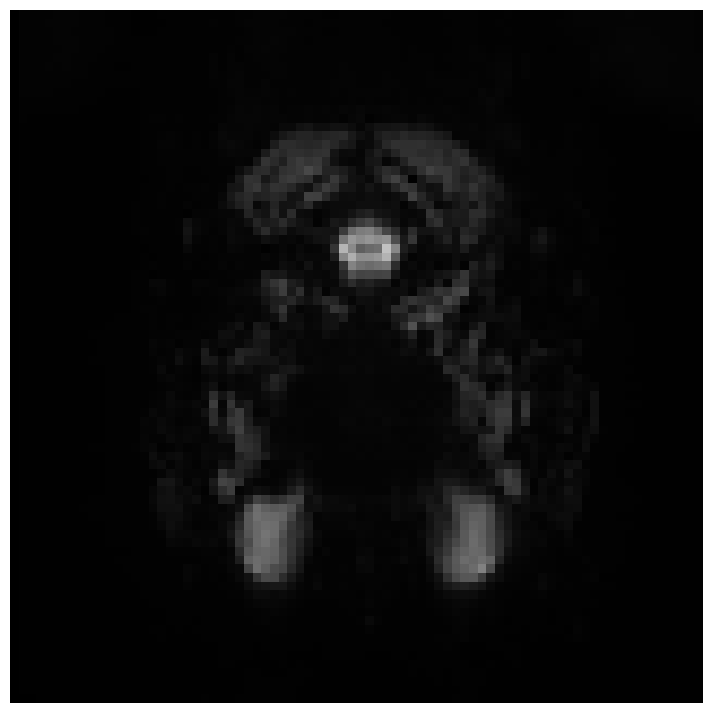

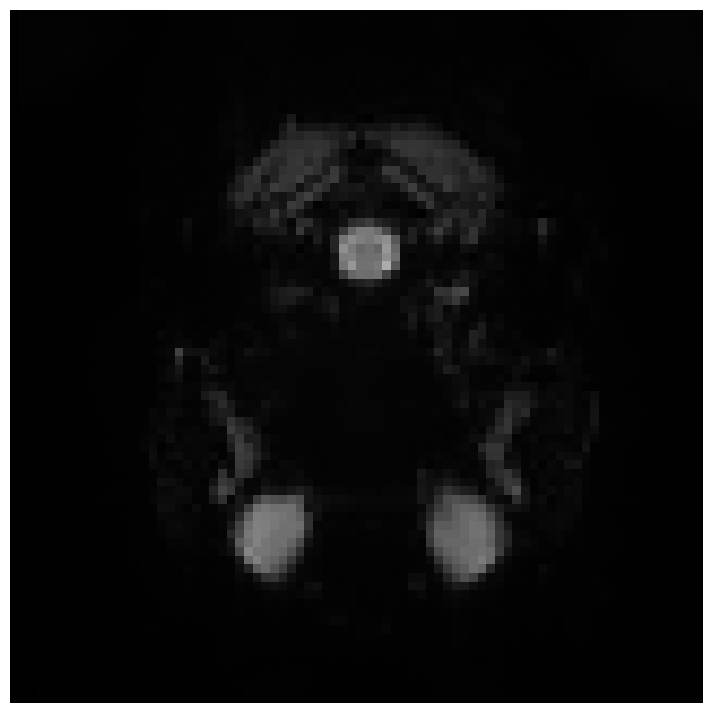

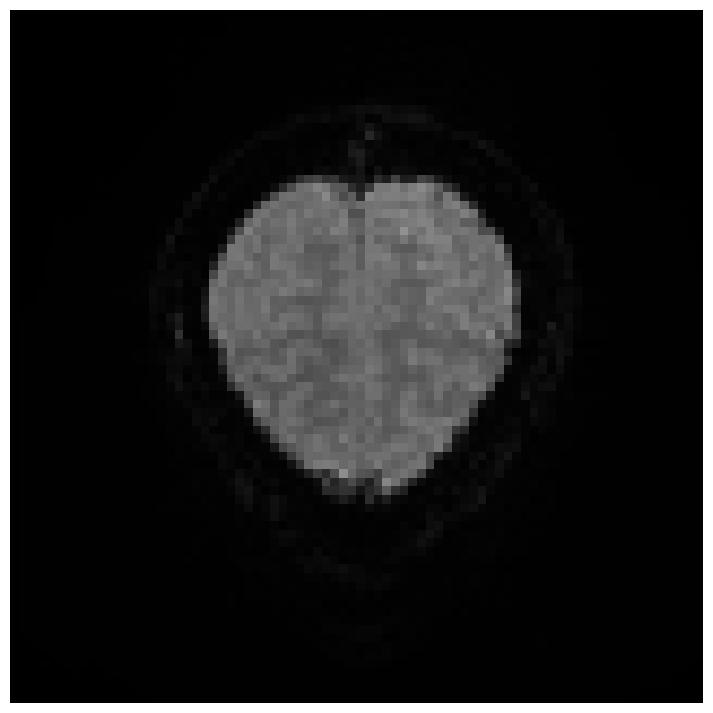

In [ ]:
def plotData(i):
    plt.figure(figsize=(9,9))
    plt.imshow(data_mean[i,:,:], cmap="gray", vmin=0, vmax=2500)
    plt.axis('off')
    
_ = interact(plotData, i=widgets.IntSlider(min=0,max=num_axial_slices-1,step=1,value=num_axial_slices/2))

Good, the plots look pretty similar! 

In summary, we loaded an actual fMRI experimental dataset and reviewed some basic data attribute info. You learned some basic 4D array data manipulation useful for fMRI data including averaging, indexing, and masking. Masking helps filter out unwanted voxels (like non-brain data) or allows us to focus in on specific brain data in a desired range of brain activity. Lastly, we plotted the masked data and the mean volume data in interactive plots to finally take a peak into the visualizable fMRI data!

# Visualizing an FMRI Dataset

Thus far, we have been able to simply load a dataset into memory and perform simple manipulation tasks to extract information from the 4D Array. In this module we will go more in depth into the different types of extractable data that can be analyzed from a single FMRI dataset and how to anlyze each of these different forms.

In [ ]:
import numpy as np
import nibabel
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import os

In [ ]:
# Load Data Locally
# Download data
url = 'https://github.com/neurotech-berkeley/neurotech-course/blob/master/module_3_fMRI_dataset/sub-control01/sub-control01_func_sub-control01_task-music_run-1_bold.nii?raw=true'
r = requests.get(url, allow_redirects=True)
open('sub-control01_func_sub-control01_task-music_run-1_bold.nii', 'wb').write(r.content)
file_path = './'
image_path = os.path.join(file_path, 'sub-control01_func_sub-control01_task-music_run-1_bold.nii')
music_img = nibabel.load(image_path)

In [ ]:
# The original (X, Y, Z, T) dimension
print("Original Shape: ", music_img.shape)
# Cache data and transpose (T, Z, Y, X)
music_data = music_img.get_fdata().T
print("Transpose Shape: ", music_data.shape)

Original Shape:  (80, 80, 50, 105)
Transpose Shape:  (105, 50, 80, 80)


With the transpose we are able to successfully flip the dimensions of the data to make manipulation easier when trying to select certain Time Steps, Volumes or Cross Sections of the FMRI Data.

*FMRI Array Types*

With these different dimensions there are numerous combinations that can be utilized to represent different FMRI Array data for different purposes. Here are a few common ones we will be looking at.

*   **Voxel Time Series** (1D) - A series of values that represent a single voxel (volumetric pixel) of area within the 3D FMRI Volume data. This voxel has a (X, Y, Z) coordinate that stays constant. These series allow for a single area in the brain to be plotted over time visualizing simple activation data.
*   **Slice Plot** (2D) - An image that represents a single frame in time and a single plane within the brain. There are defined biological sectional views that will be defined later.
*   **Volume Plot** (3D) - Either a series of Slice Plots upon a certain axis or an interactive 3D representation of the brain at a single time frame.

These plots can be combined with other dimensions such as time to represent more interactive views of the data. The basic premise behind FMRI is using these visual patterns over time to derive conclusions.

*Voxel Selection*

There are many forms of extractable data that can be visualized and analyzed from a single Voxel Timeseries FMRI Scan (4D) this is the form that you have been loading thus far. After transposing the data is shaped with the dimensions (T, Z, Y, X) where when looking from the **front** or **"face"** of the brain.

*   **T** (Time Steps) Each time step measure is taken with some standard sampling rate around 1 to 2 second intervals. Take note when visualizing a timeseries as the index does not coresspond 1 to 1 on the time.
*   **Z** (Top to Bottom)
*   **X** (Left to Right)
*   **Y** (Front to Back)

We will use **Voxel Selection** techniques to generate a **Voxel Time Series** plot of a region of interest within the data array. 

In [ ]:
# Using Slicing select a single voxel at (Z=21, Y=50, X=51)
time_series = music_data[:, 21, 50, 51]
print(time_series)

[808. 816. 803. 797. 829. 810. 813. 848. 803. 803. 782. 796. 800. 790.
 811. 818. 793. 772. 804. 775. 796. 811. 807. 809. 802. 797. 807. 793.
 796. 824. 794. 797. 788. 822. 778. 806. 821. 794. 818. 788. 820. 821.
 834. 812. 822. 818. 792. 813. 836. 816. 828. 805. 810. 786. 780. 814.
 794. 803. 796. 797. 804. 791. 793. 782. 780. 815. 803. 811. 796. 802.
 782. 784. 832. 765. 814. 799. 808. 836. 810. 799. 785. 794. 835. 794.
 784. 809. 818. 836. 807. 795. 812. 795. 817. 827. 809. 802. 810. 798.
 808. 805. 810. 809. 805. 789. 786.]


Text(0, 0.5, 'BOLD Signal (a.u.)')

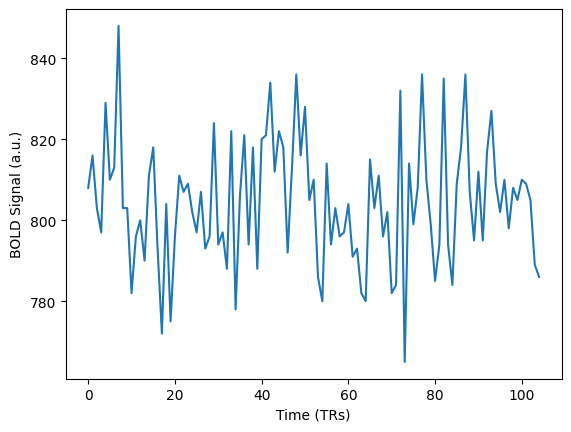

In [ ]:
# Line Plot
plt.plot(time_series)
plt.xlabel('Time (TRs)')
plt.ylabel('BOLD Signal (a.u.)')

This voxel plot is very random for now but as we apply further preprocessing analysis techniques we will be able to better understand activation sites and patterns that occur within them.

*Sectional Slicing*


From voxel timeseries plots the next most popular visualization is the set of sectional 2D plots of the brains. There are a set of terms to describe the three most medically common views. All these views have the temporal dimension fixed and one other coordinate fixed.

*  **Axial** (or horizontal) slice: plane in (X,Y)
*  **Coronal** slice: plane in (X,Z)
*  **Sagittal** slice: plane in (Y,Z)

<img src="https://images.ctfassets.net/cnu0m8re1exe/1k0YS9HKpsyurGlnI1Zlky/223cbf9b658b7068925ba7f944a9bb39/sagittal.jpg" alt="Drawing" width="400px"/>

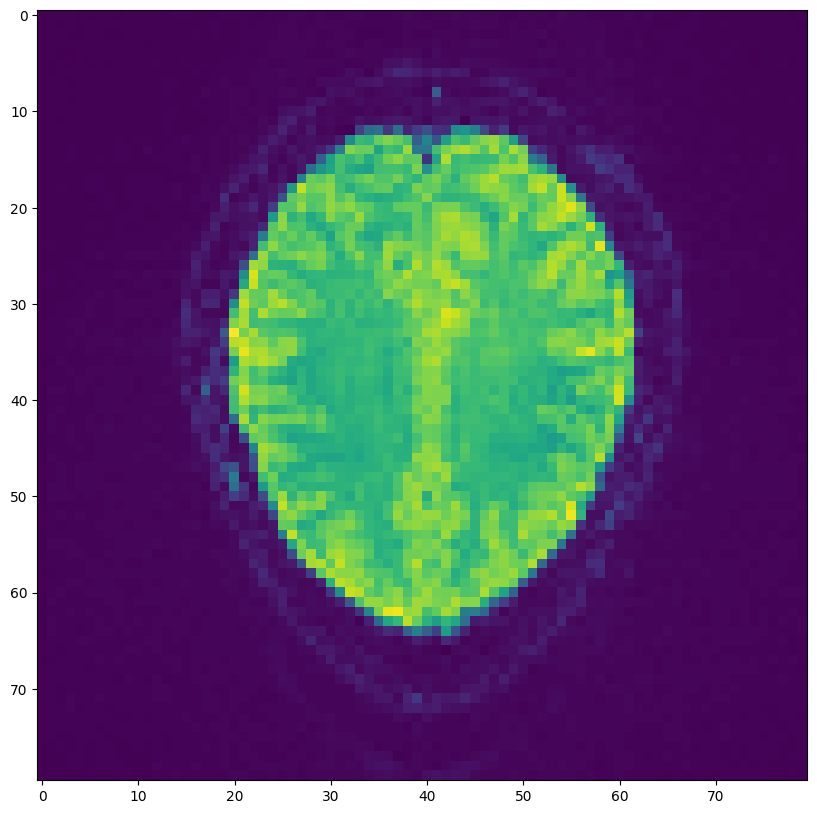

In [ ]:
# Basic Axial Slice (Set Z fixed)
slice_axial = music_data[5, 30, :, :]
fig = plt.figure(figsize=(10, 10))
im = plt.imshow(slice_axial)

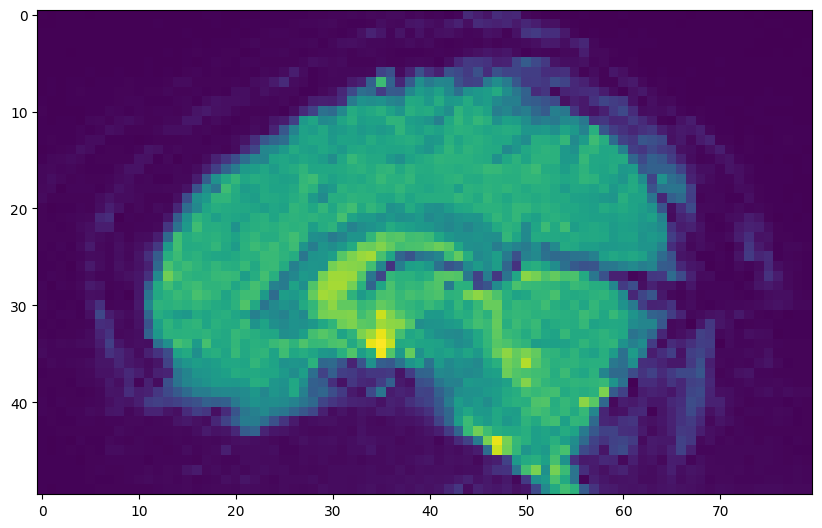

In [ ]:
# Basic Sagittal Slice (Fixed X)
slice_sagittal = music_data[5, :, :, 40]
# Flip View on (Z, Y)Due to Indexing
slice_sagittal = np.flip(axis=(0,1), m=slice_sagittal)
fig = plt.figure(figsize=(10, 10))
im = plt.imshow(slice_sagittal)

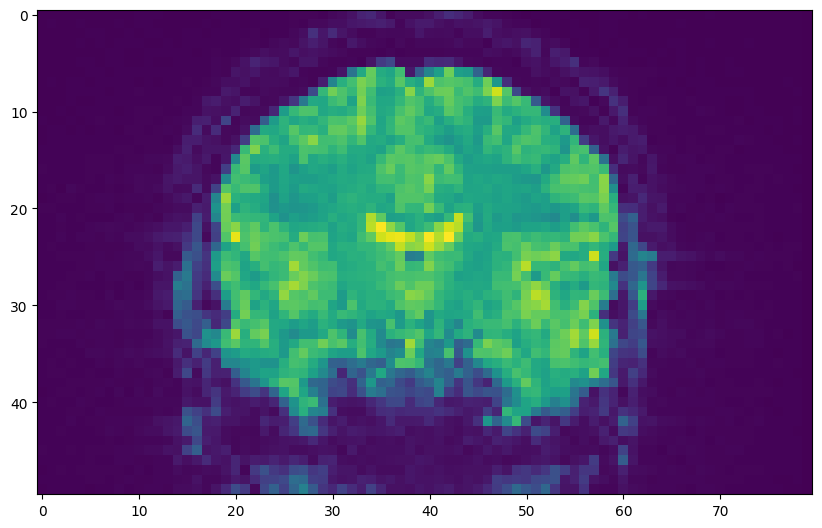

In [ ]:
# Basic Coronal Slice (Fixed Y)
slice_sagittal = music_data[5, :, 40, :]
# Flip View on (Z, X) Due to Indexing
slice_sagittal = np.flip(axis=(0,1), m=slice_sagittal)
fig = plt.figure(figsize=(10, 10))
im = plt.imshow(slice_sagittal)

*Volume Visualization*

Using a combination of techniques applied above and the use of interactive python elements one could create a sectional Volume Map of an fmri at a certain time point. We will be utilizing subplots to plot a set of plots for a certain sectional view.

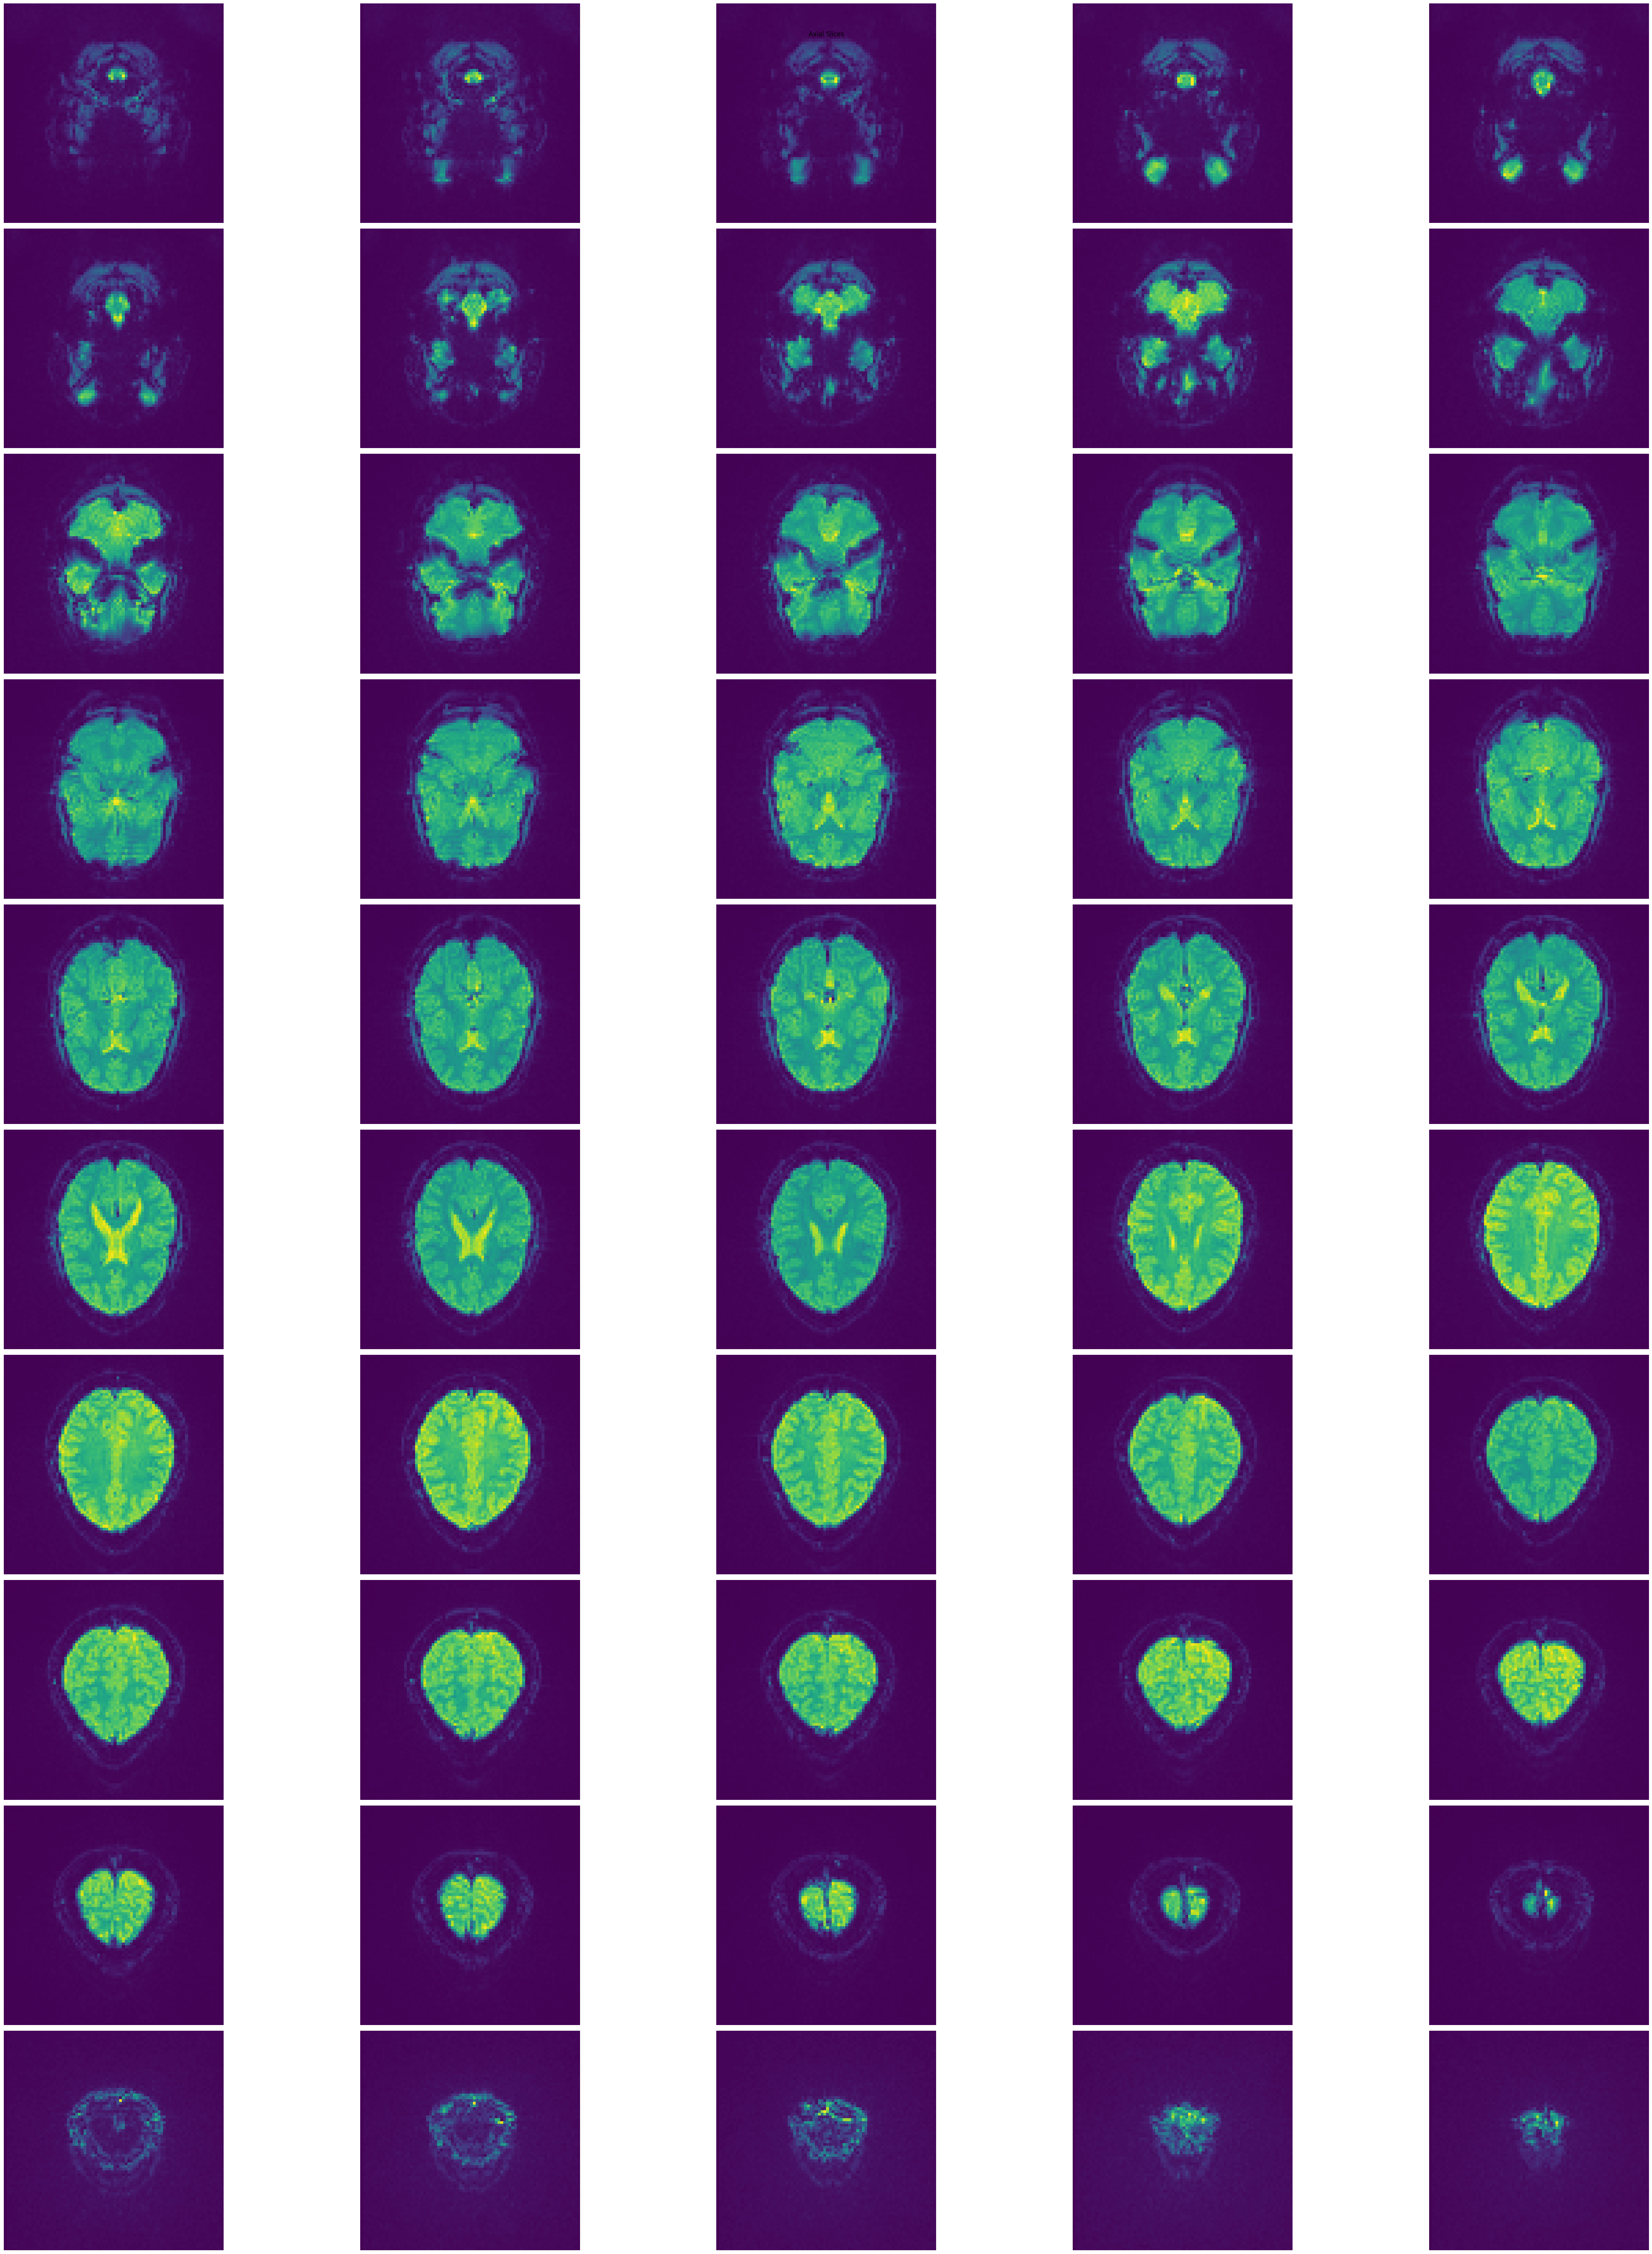

In [ ]:
# Axial Slices
plt.figure(figsize=(50, 60))
for i in np.arange(music_data.shape[1]):
    plt.subplot(10, 5, i + 1)
    plt.imshow(music_data[5, i, :, :])
    plt.axis('off')
plt.suptitle("Axial Slices")
plt.tight_layout()

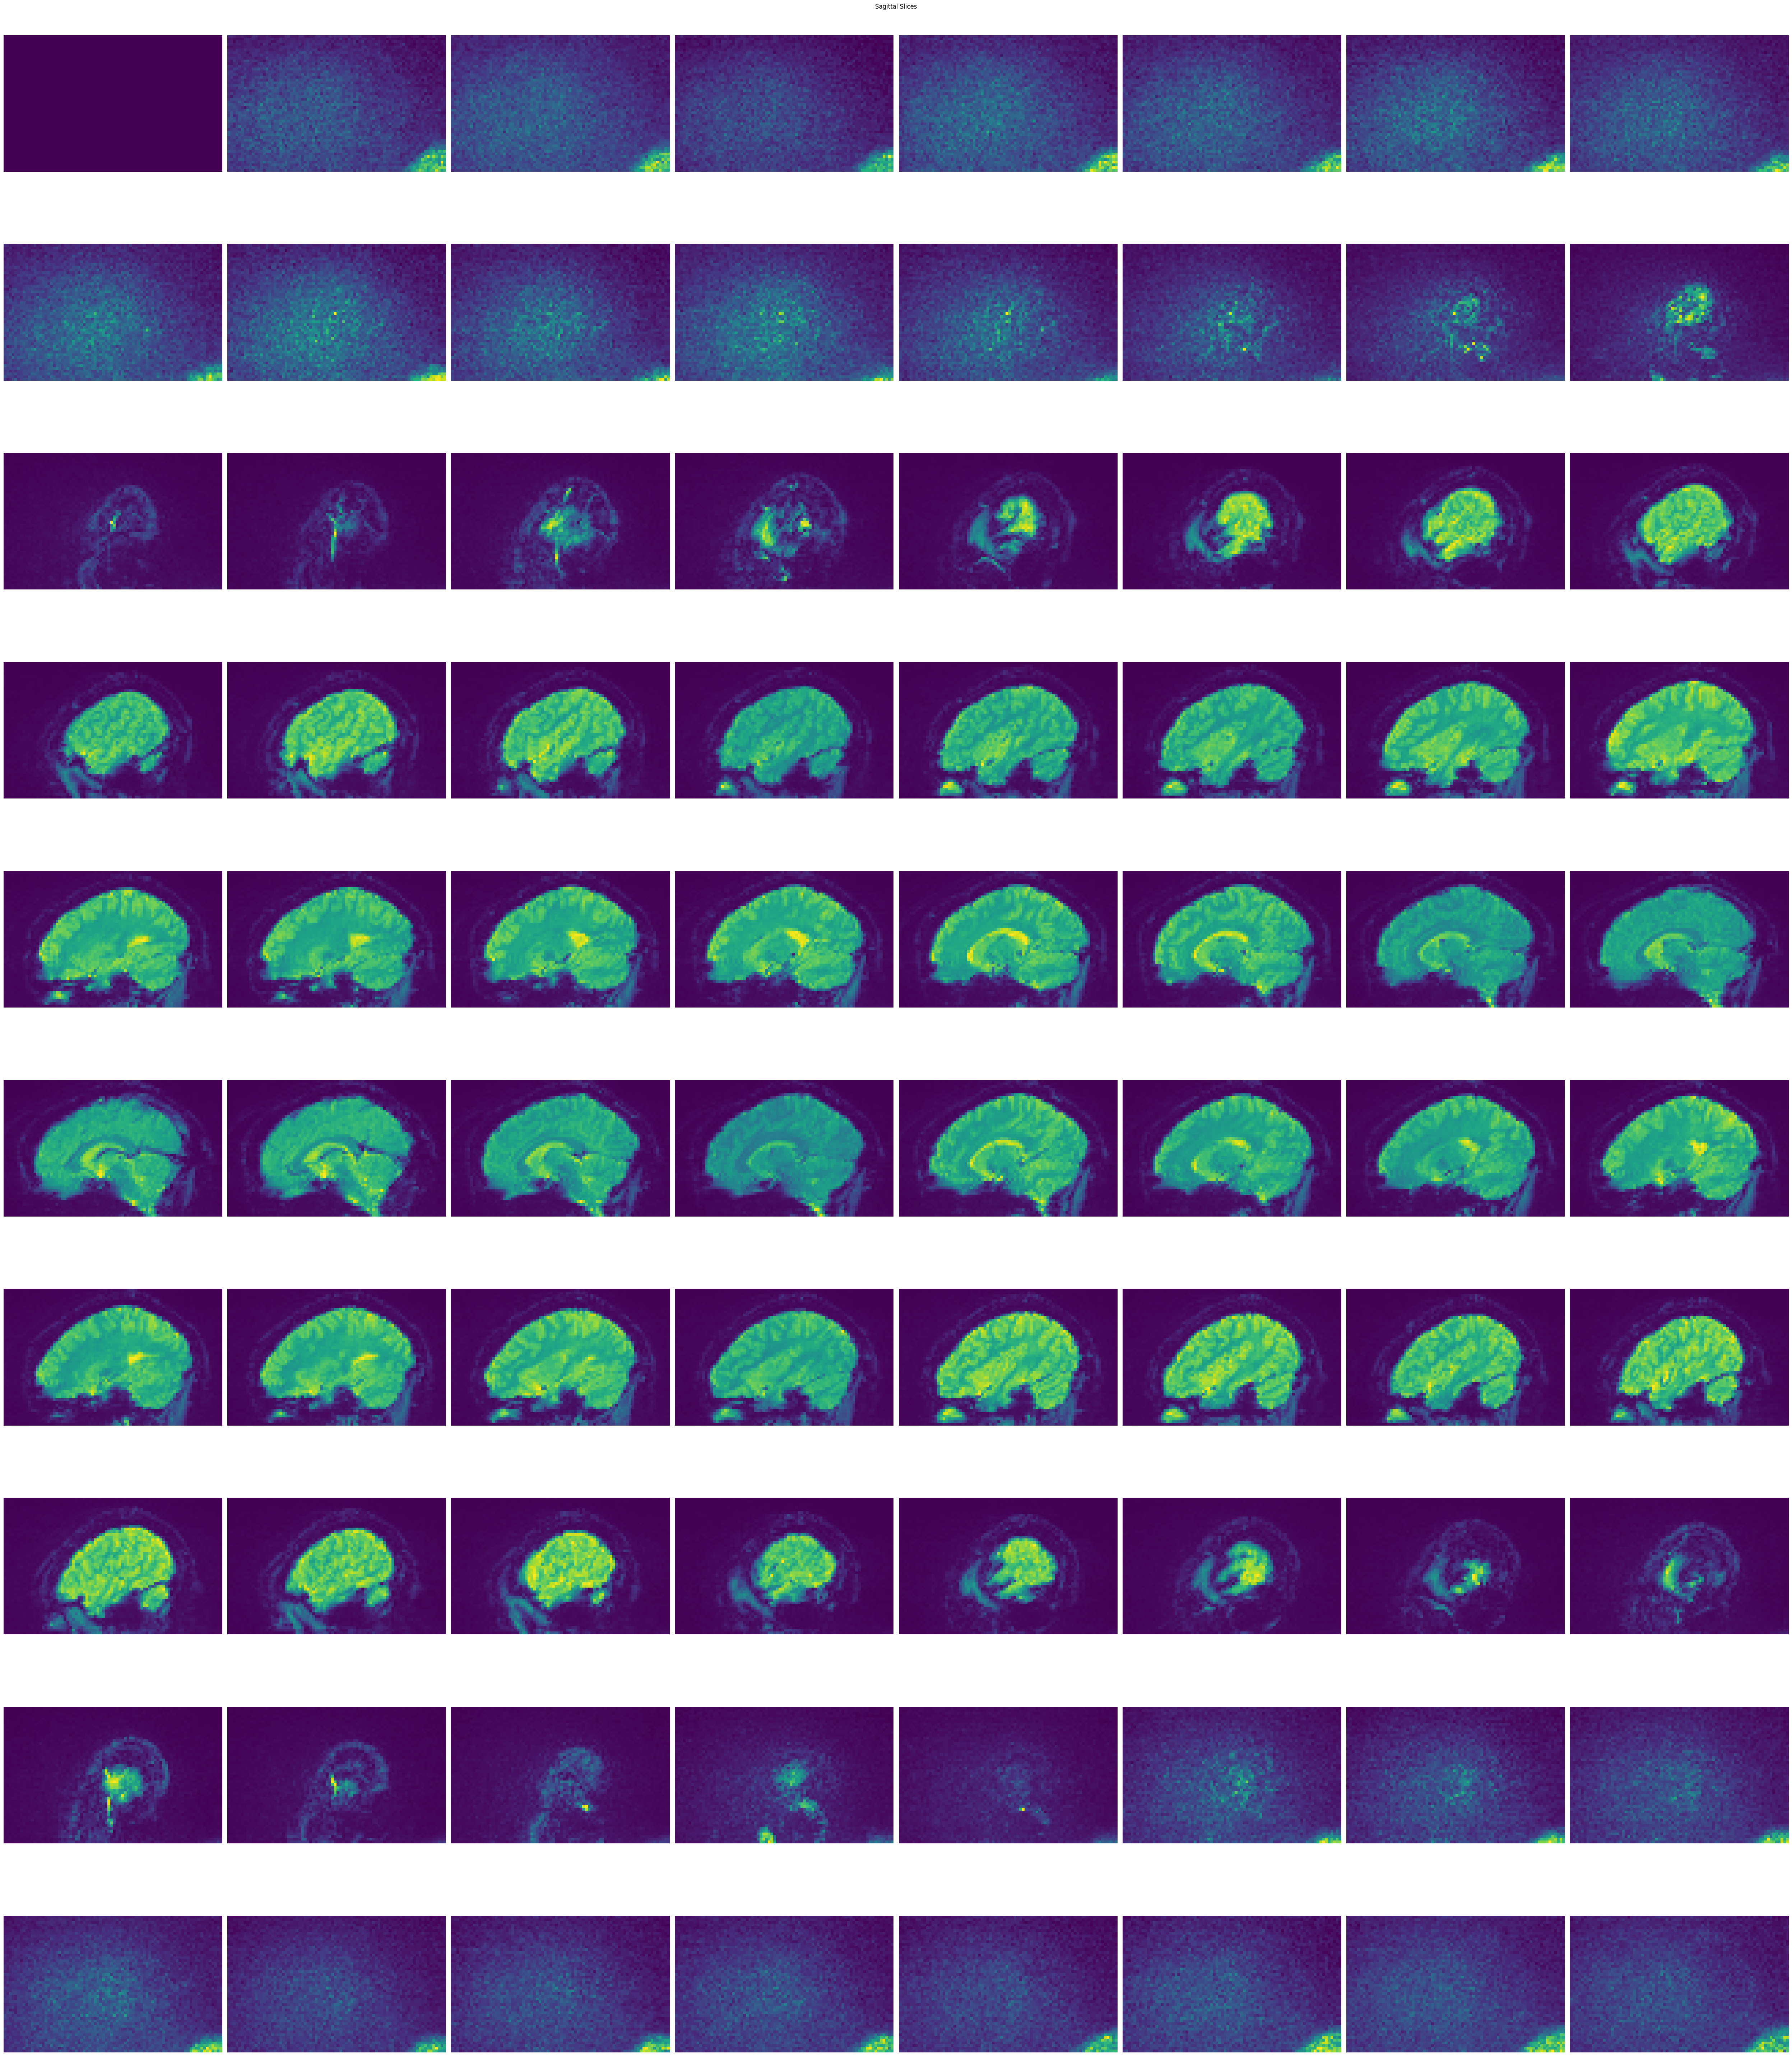

In [ ]:
# Sagittal Slices
plt.figure(figsize=(50, 60))
for i in np.arange(music_data.shape[3]):
    plt.subplot(10, 8, i + 1)
    slice_sagittal = music_data[5, :, :, i]
    slice_sagittal = np.flip(axis=(0,1), m=slice_sagittal)
    plt.imshow(slice_sagittal)
    plt.axis('off')
plt.suptitle("Sagittal Slices")
plt.tight_layout()

**DO THIS FOR COMPLETION:**

In [ ]:
# Coronal Slices

# YOUR CODE HERE

If you have a further intrest in complex visualization check out the **pycortex** library at https://gallantlab.github.io/pycortex/index.html. The library has much more complex visualization algorithms that can be applied that dont work natively in these colabs.